![Scipy Logo](images/scipy_logo2.png)

## An Overview of Scipy and Scipy.Stats

---

### **Firstly what is SciPy**

SciPy is an open source scientific library for Python which gives us the ability to perform Mathematical, Scientific and Engineering Computations. SciPy also provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems..

The SciPy library is built to work with NumPy arrays and provides use with many user-friendly and efficient numerical practices such as routines for numerical integration and optimization. NumPy and SciPy are easy to use, but powerful enough to be used by some of the world's leading scientists and engineers.!!! 

#### **What is SciPy.stats?**

All of the statistics functions of the SciPy library are located in the sub-package named scipy.stats. used for statistical analysis

##### **Uses of SciPy.stats**

From my research I found out that the stats module scipy.stats is a very important feature of SciPy. 

It is useful for obtaining probabilistic distributions. SciPy Stats can generate discrete or continuous random numbers. It also consists of many other functions to generate descriptive statistical values. We can deal with random, continuous, and random variables. It also has functions for working with various types of distributions. 

It offers us the ability to perform a wide range of statistic analysis.

[1] https://scipy.org/

[2] https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm

[3] https://docs.scipy.org/doc/scipy/reference/stats.html

### **Overview of ANOVA Testing**

ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. Variance in the ANOVA is partitioned into total variance, variance due to groups, and variance due to individual differences.

The ratio obtained when doing this comparison is known as the F-ratio. A one-way ANOVA can be seen as a regression model with a single categorical predictor. This predictor usually has two plus categories. A one-way ANOVA has a single factor with J levels. Each level corresponds to the groups in the independent measures design

Each experimental condition should have roughly the same variance (i.e., homogeneity of variance), the observations (e.g., each group) should be independent, and the dependent variable should be measured on, at least,  an interval scale.
https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/


#### Assumptions 
- Assumption 1: Dependent variable*** -Dependent variable should be measured at the interval or ratio level
- Assumption 2: Independent variable*** - Independent variable should consist of two or more categorical, independent groups.
- Assumption 3: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves
- Assumption 4: Outliers - There should be no significant outliers.
- Assumption 5: Normality -  Dependent variable should be approximately normally distributed for each category of the independent variable.
- Assumption 6: Homogeneity of Variances - There needs to be homogeneity of variances

I will go through these 6 assumptions below when performing my Anova Testing below on my sample datasets.


#### A word on T - Tests 

T-tests are among the most common statistical tests performed in world. 

T Test  is a statistical significance test that is used to compare the means of two groups and determine if the difference in means is statistically significant

For example, you could use an independent t-test to understand whether first year graduate salaries differed based on gender (i.e., your dependent variable would be "first year graduate salaries" and your independent variable would be "gender", which has two groups: "male" and "female").

In [1]:
## Start with my imports
# Numerical arrays.
import numpy as np
# Plotting.
import seaborn as sns
# Stats.
import scipy.stats as ss
from scipy.stats import ttest_ind
#pandas 
import pandas as pd

Import in my test datasets - Grades Dataset

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/footfalls.csv")
df_grades = pd.read_csv('datasets/grades/exam_grades.csv')
df_grades["sex"] = df_grades["sex"].astype("category")
course_grade = df_grades['course_grade']

viusalise my categories

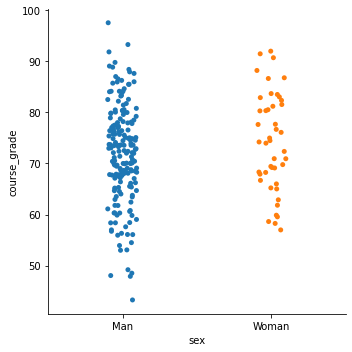

In [3]:
sns.catplot(x ='sex', y ='course_grade',jitter=True ,data=df_grades);

In [4]:
#df.info()
male_group = df_grades.loc[df_grades["sex"] =='Man',"course_grade"]



female_group = df_grades.loc[df_grades["sex"] =='Woman', "course_grade"]
female_group

t_ss, p_ss = ss.ttest_ind(male_group,female_group)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -1.421028169981253	p-value: 0.15666292284818942
P_scipy: 0.16


In [5]:
F,P = ss.f_oneway(male_group,female_group)
print(f"{P:.2f}")

0.16


Discuss problems when comparing 3 groups etc and why Anova testing is preferrered

## Demonstrations of Anova

## Exploring the dataset - work lending

In [6]:
#import dataset
df = pd.read_csv('datasets/work/work_data.csv')
#display daframe
df

,Demographic_Category,Loan_Category,Loan_Amount_Issued
0,YOUNG SINGLE,PERSONAL,250.0
1,YOUNG SINGLE,PERSONAL,250.0
2,YOUNG SINGLE,PERSONAL,250.0
3,YOUNG SINGLE,PERSONAL,250.0
4,YOUNG SINGLE,PERSONAL,250.0
...,...,...,...
2491,OVER 50s,PERSONAL,8000.0
2492,OVER 65s,PERSONAL,8000.0
2493,OVER 65s,PERSONAL,8000.0
2494,OVER 65s,PERSONAL,8000.0


In [7]:
#display on screen first 5 rows
df.head()

,Demographic_Category,Loan_Category,Loan_Amount_Issued
0,YOUNG SINGLE,PERSONAL,250.0
1,YOUNG SINGLE,PERSONAL,250.0
2,YOUNG SINGLE,PERSONAL,250.0
3,YOUNG SINGLE,PERSONAL,250.0
4,YOUNG SINGLE,PERSONAL,250.0


In [8]:
#show a tabular discription of the dataset
df.describe()

,Loan_Amount_Issued
count,2496.000000
mean,2364.489042
std,2115.866110
min,250.000000
25%,600.000000
50%,1500.000000
75%,3500.000000
max,8000.000000


## Assumptions

When we choose to analyse our data using a one-way ANOVA, part of the process involves checking to make sure that the data we want to analyse can actually be analysed using a one-way ANOVA. We need to do this because it is only appropriate to use a one-way ANOVA if our data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result. [https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php]

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [9]:
# Loam Amount Issued is The dependent variable.
#df["Loan_Amount_Issued"] = df.Loan_Amount_Issued.astype(float)
dependent = df['Loan_Amount_Issued']
x = dependent
x

0        250.0
1        250.0
2        250.0
3        250.0
4        250.0
         ...  
2491    8000.0
2492    8000.0
2493    8000.0
2494    8000.0
2495    8000.0
Name: Loan_Amount_Issued, Length: 2496, dtype: float64

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

In [10]:
# Independent variable.
independent = df['Demographic_Category']
independent
#use grouby and get count of each gender in dataset
df.groupby(by = "Demographic_Category").count()

,Loan_Category,Loan_Amount_Issued
Demographic_Category,,
ADULT SINGLE,255,255
OVER 50s,586,586
OVER 65s,374,374
SINGLE PARENT,434,434
YOUNG COUPLE,75,75
YOUNG FAMILY,293,293
YOUNG SINGLE,479,479


**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Check - age demographic has to fit into one of the cateogries - you cant have two ages

***Assumption 4: Outliers***

There should be no significant outliers.

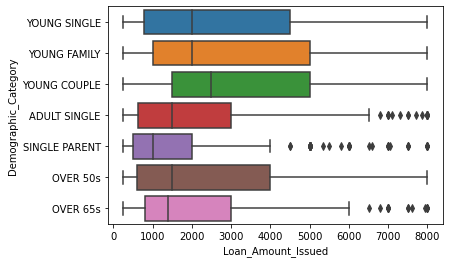

In [11]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

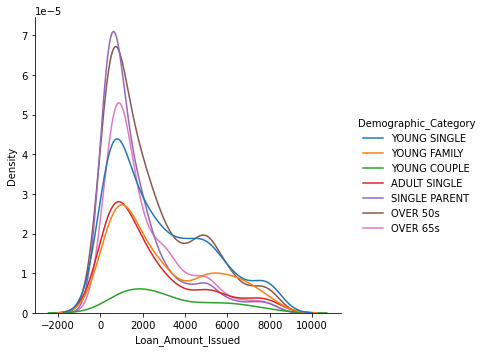

In [12]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

In [13]:
# Test for equal variances.
ss.levene(

    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'ADULT SINGLE'],
    dependent[independent == 'SINGLE PARENT'],
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
)

LeveneResult(statistic=12.544527329160967, pvalue=5.578715322188425e-14)

In [14]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'YOUNG FAMILY'],
    )

F_onewayResult(statistic=0.16614334962113536, pvalue=0.6836756280911702)

## Performing a One Way Anova on my sample work dataset

In [30]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'YOUNG FAMILY'],
    )

C:\Users\brend\anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [16]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'SINGLE PARENT'],
    )

F_onewayResult(statistic=45.86144988786536, pvalue=3.524680925915029e-11)

In [17]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG SINGLE'],
    dependent[independent == 'ADULT SINGLE'],
    )

F_onewayResult(statistic=7.806858223270605, pvalue=0.005340934905039282)

In [18]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'OVER 65s'],
    )

F_onewayResult(statistic=4.536511037461709, pvalue=0.03343348142700329)

In [19]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'OVER 50s'],
    dependent[independent == 'ADULT SINGLE'],
    )

F_onewayResult(statistic=0.19022779187524969, pvalue=0.662839298251073)

We can see that the significance value is 0.021 (i.e., p = .021), which is below 0.05. and, therefore, there is a statistically significant difference in the mean length of time to complete the spreadsheet problem between the different courses takE

## WELCH ANOVA

### Exploring the dataset - exam grades

In [31]:
#import dataset
#df_grades= pd.read_csv('datasets/grades/exam_grades.csv')
#display daframe
df_grades

,ID,sex,exam1,exam2,exam3,course_grade
0,1,Man,84.5000,69.5,86.5000,76.2564
1,2,Man,80.0000,74.0,67.0000,75.3882
2,3,Man,56.0000,70.0,71.5000,67.0564
3,4,Man,64.0000,61.0,67.5000,63.4538
4,5,Man,90.5000,72.5,75.0000,72.3949
...,...,...,...,...,...,...
227,228,Man,98.2143,89.1,71.1111,85.5208
228,229,Woman,95.0000,86.0,78.3333,83.6959
229,230,Man,97.1429,53.5,67.2222,72.1189
230,231,Man,85.0000,63.0,75.0000,67.1996


In [32]:
#display on screen first 5 rows
df_grades.head()

,ID,sex,exam1,exam2,exam3,course_grade
0,1,Man,84.5,69.5,86.5,76.2564
1,2,Man,80.0,74.0,67.0,75.3882
2,3,Man,56.0,70.0,71.5,67.0564
3,4,Man,64.0,61.0,67.5,63.4538
4,5,Man,90.5,72.5,75.0,72.3949


In [22]:
#show a tabular discription of the dataset
df.describe()

,ID,exam1,exam2,exam3,course_grade
count,232.000000,232.000000,232.000000,232.000000,232.000000
mean,116.500000,80.766185,72.668534,75.467289,72.348812
std,67.116814,11.067860,13.773631,14.737388,9.683186
min,1.000000,46.500000,38.000000,28.000000,43.273300
25%,58.750000,73.500000,63.375000,67.000000,66.966250
50%,116.500000,82.000000,74.000000,78.000000,72.643350
75%,174.250000,89.625000,83.000000,86.100000,79.007100
max,232.000000,99.300000,99.500000,98.888900,97.566700


### **Assumptions**

When we choose to analyse our data using a one-way ANOVA, part of the process involves checking to make sure that the data we want to analyse can actually be analysed using a one-way ANOVA. We need to do this because it is only appropriate to use a one-way ANOVA if our data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result. [https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php]

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [23]:
# Course grade is The dependent variable.
dependent2 = df['course_grade']
x = dependent2
x

0      76.2564
1      75.3882
2      67.0564
3      63.4538
4      72.3949
        ...   
227    85.5208
228    83.6959
229    72.1189
230    67.1996
231    66.4035
Name: course_grade, Length: 232, dtype: float64

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

Check - Independent variable will be gender - male or female

In [24]:
# Independent variable.
independent2 = df['sex']
independent2
#use grouby and get count of each gender in dataset
df.groupby(by = "sex").count()

,ID,exam1,exam2,exam3,course_grade
sex,,,,,
Man,187,187,187,187,187
Woman,45,45,45,45,45


**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Check - gender has to be either male or female

***Assumption 4: Outliers***

There should be no significant outliers.

In [29]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent2, y=independent2)

NameError: name 'dependent2' is not defined

Check - We can note from above there is some outliers for male but should not be significant enough to affect our anova, this can be seen with the outliers shows as diamond symbols -  further testing to see ...

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

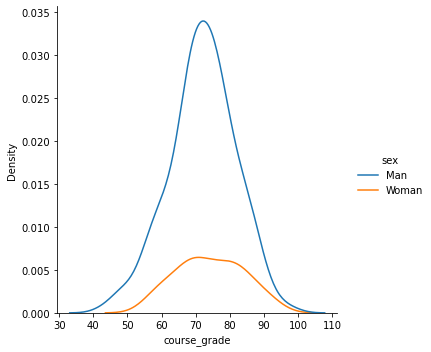

In [26]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

We can see from plot above both the dependent variable "grade" for each gender can be classed as normally distributed

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

In [27]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'Man'],
    dependent[independent == 'Woman'],
    )

LeveneResult(statistic=0.23917437035338962, pvalue=0.6252690966953789)

BR NOTE NEED TO BEEF UP AND ADD MORE EXPLANATIONS ETC

### One-way ANOVA

In [28]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'Man'],
    dependent[independent == 'Woman'],
    )

F_onewayResult(statistic=2.019321059880278, pvalue=0.15666292284819547)

BR NOTE - NEED TO PROVIDE MORE INFO AND WHAT THE RESULT MEANS ETC 

WELCH ANOVOA ETC -----


### Post Hoct Tests

### Conclusion and Findings

### References and Research to go here - (BR note -  more research currently in the word document )

#### Scipy and Scipy.stats

[1] Offical SciPy website - https://scipy.org/

[2] Tutroialspoint SciPy quick guide: https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm

[3] Offical SciPy stats refernce website: https://docs.scipy.org/doc/scipy/reference/stats.html


#### Anova Testing - T Tests 

Four Ways to Conduct One-Way ANOVA with Python - Erik Marsja - [https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/]

Exploratory Data Analysis in Python - GeeksforGeeks - [https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/]

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

ANOVA Test: Definition, Types, Examples, SPSS - Statistics How To [https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/]

####  Other 

Pandas Group By: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html


#### Basic Syntax Markdown - https://www.markdownguide.org/basic-syntax/



# END